# Overlaying my in-vitro derived signature of tumour uptake

* following visualisation in 2024-11-15_Visualising-clean.jpynb
* now overlaying my sig

# Set up workspace:

In [1]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import seaborn as sns

In [2]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/scdata/Python_Integration_Sep')
os.getcwd()

'/scratch/user/s4436039/scdata/Python_Integration_Sep'

Print software versions:

In [3]:
sc.logging.print_header()

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12


In [4]:
ddl.logging.print_header()

dandelion==0.3.8 pandas==2.2.2 numpy==1.26.4 matplotlib==3.9.2 networkx==3.3 scipy==1.14.0


Set plotting parameters

In [ ]:
#sc.settings.set_figure_params(dpi=80, facecolor="white")
#getting rid of this as it messes up heatmaps

In [5]:
# read in data
data = sc.read_h5ad('NRclean_clustered.h5ad')

In [6]:
data

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotati

### Overlay my tumour uptake signature: 

In [7]:
#make an object with my sig - see excel file Nikita-mregDC_DEG_summary on i drive
Uptake_sig = ["CCL22","IL4I1","SIRPA","CCR7","CHST11","GPR157","RGS1","BIRC3","TRAF1","CSF2RA","TBC1D13","LAMP3","MREG","PPP1R14A","SPRED2","CD83","TXN","MOB3A","NFKB1","TBC1D4","CDK2","WFDC21P","ARAP2","ZER1","ACSL1","SPINT2","SQSTM1","TBC1D8","JAG1","AC073508.3","BATF","ETV3","BCL2","KIF2A","FSCN1","TNFAIP3","CCDC28B","NR4A3","CYTIP","PLEK","FOXO1","TOMM34","TRAFD1","PPP1R16B","CXCR4","CD40","ENTPD7","CDKN1A","BID","MARCKS","DUSP5","MAP4K4","BCL2L1","ISG20","RNF145","RNF121","GPR132","RASGEF1B","CYRIA","RAB10","CERS6","IL1R1","STK4","CLEC2D","AL390719.1","ZBTB38","IFNGR2","CD274","SLC41A2","NRP2","ANKRD33B","GPR183","POGLUT1","ADORA2A","JADE3","KHDRBS3","CTNNB1","SLCO5A1","NFKB2","RGS2","SEC61B","ZNRF1","RELB","C12orf45","IRF2","EPOP","MXD1","RAB5B","PADI2","DRAM1","MTMR4","EEF2K","GCNT2","RAPH1","BCL2A1","SEC23B","PIM3","ANTXR2","ABTB2","TMEM200A"]    

In [8]:
#score genes
sc.tl.score_genes(data, Uptake_sig, score_name='Uptake_sig')

In [9]:
colour_vars = ["Uptake_sig","NR_annotations_simple"]

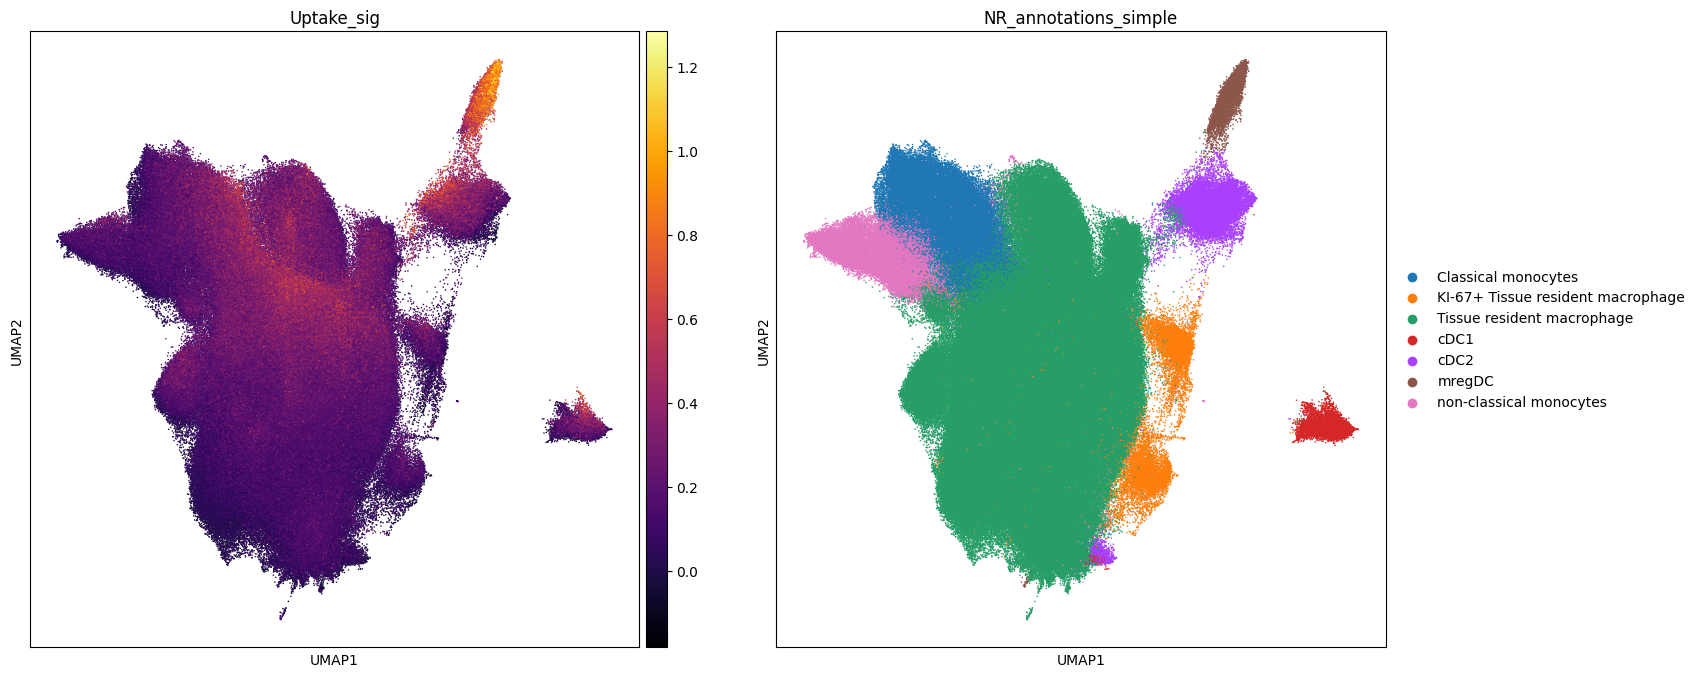

In [10]:
#plotting 
with plt.rc_context({"figure.figsize": (8, 8)}):
    sc.pl.umap(data, color=colour_vars, ncols=2, size=5, color_map="inferno")

In [24]:
# Calculate the mean scores for each cluster
cluster_labels = data.obs['NR_annotations_simple']
uptake_scores = data.obs['Uptake_sig']

In [25]:
# Create a DataFrame with the mean scores per cluster
scores_df = pd.DataFrame({
    'Uptake_score': uptake_scores.groupby(cluster_labels).mean(),
})

/scratch/temp/11603491/ipykernel_2086221/2087912047.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


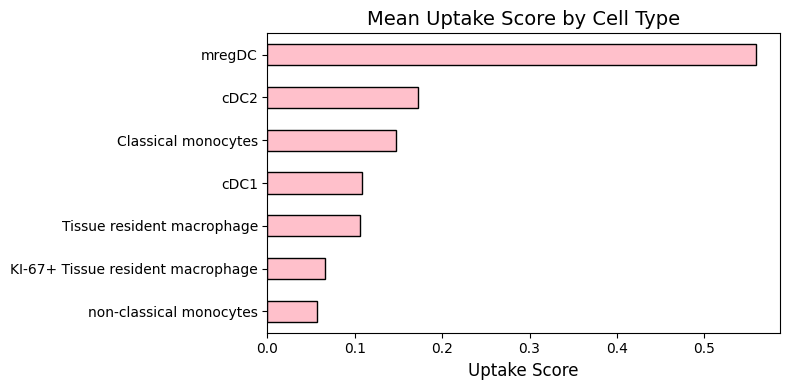

In [30]:
# Plot as a horizontal bar chart
plt.figure(figsize=(8, 4))
scores_df['Uptake_score'].sort_values().plot.barh(
    color='pink', edgecolor='black', legend=False
)
plt.title("Mean Uptake Score by Cell Type", fontsize=14)
plt.xlabel("Uptake Score", fontsize=12)
plt.ylabel("")
plt.tight_layout()
plt.show()

### From the above two figures we can see that our in vitro signature aligns with mregDC. While there is enrichment for the signature in other areas of the plot, which may represent populations taking up tumour, the signature as a whole appears very distinct and highly enriched by mregDC

### split by cancer subtype, seperated by sample type

In [11]:
#make sub-objects for primary, mets, and healthy
#make OC object

#make an object for just primary and metastatic tumours
data_primary = data[data.obs["sample_type_major2"] == "primary tumour"]
data_mets = data[data.obs["sample_type_major2"] == "metastatic tumour"]
data_H = data[data.obs["sample_type_major2"] == "healthy"]
data_OC = data[data.obs["cancer_with_H"] == "HGSOC"]

/scratch/temp/11603491/ipykernel_2086221/2265545486.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


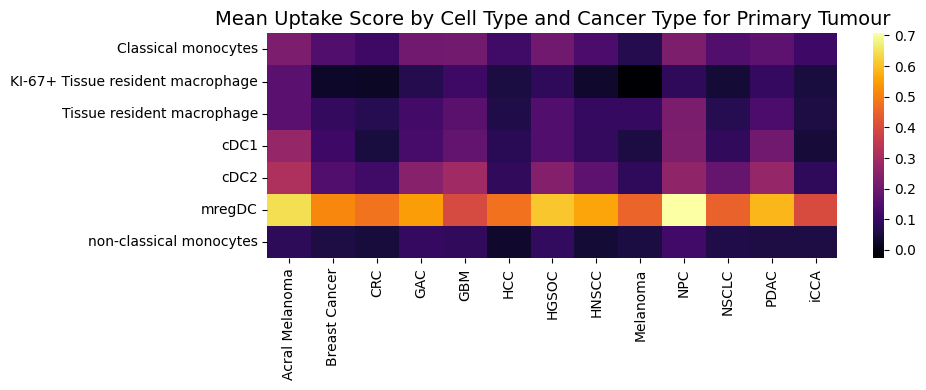

In [71]:
#Primary:

# Calculate the mean scores for each cancer type
cell_types = data_primary.obs['NR_annotations_simple']
cancer_types = data_primary.obs['cancer_with_H']
uptake_scores = data_primary.obs['Uptake_sig']

# Create a DataFrame with the mean scores per cell type and cancer type
scores_df = pd.DataFrame({
    'Uptake_score': uptake_scores.groupby([cancer_types, cell_types]).mean(),
})

# Pivot the DataFrame to have cancer types as columns and cell types as rows
scores_df = scores_df.unstack(level=1).T  # Unstack cancer types to columns, leaving cell types as rows

# Remove the "Uptake_score" prefix from the row labels
scores_df.index = scores_df.index.droplevel(0)  # Drop the first level of the index (Uptake_score)

# Plot the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(scores_df, cmap='inferno', annot=False, cbar=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Mean Uptake Score by Cell Type and Cancer Type for Primary Tumour', fontsize=14)
plt.tight_layout()
plt.show()

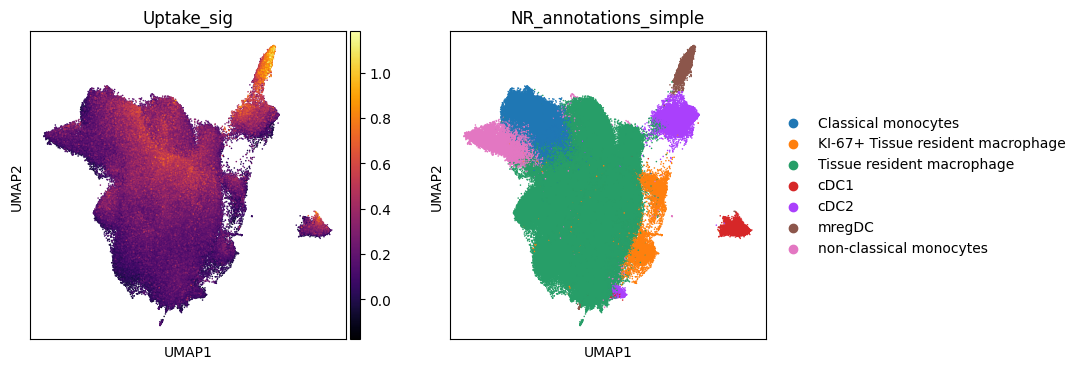

In [19]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_primary, color=colour_vars, ncols=2, size=5, color_map="inferno")

/scratch/temp/11603491/ipykernel_2086221/3746593416.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


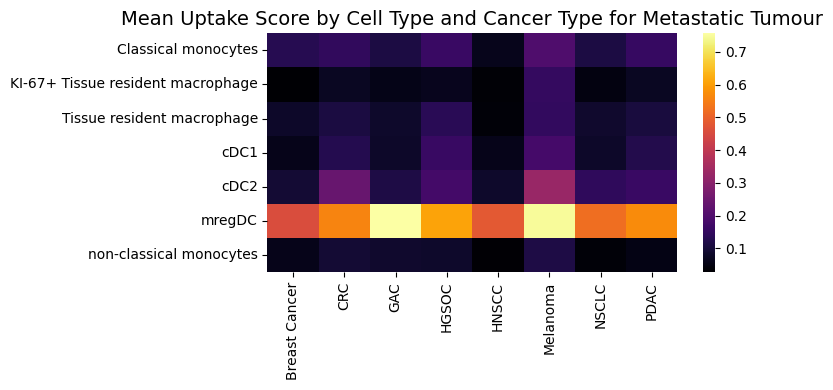

In [80]:
#Mets:

# Calculate the mean scores for each cancer type
cell_types = data_mets.obs['NR_annotations_simple']
cancer_types = data_mets.obs['cancer_with_H']
uptake_scores = data_mets.obs['Uptake_sig']

# Create a DataFrame with the mean scores per cell type and cancer type
scores_df = pd.DataFrame({
    'Uptake_score': uptake_scores.groupby([cancer_types, cell_types]).mean(),
})

# Pivot the DataFrame to have cancer types as columns and cell types as rows
scores_df = scores_df.unstack(level=1).T  # Unstack cancer types to columns, leaving cell types as rows

# Remove the "Uptake_score" prefix from the row labels
scores_df.index = scores_df.index.droplevel(0)  # Drop the first level of the index (Uptake_score)

# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(scores_df, cmap='inferno', annot=False, cbar=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Mean Uptake Score by Cell Type and Cancer Type for Metastatic Tumour', fontsize=14)
plt.tight_layout()
plt.show()

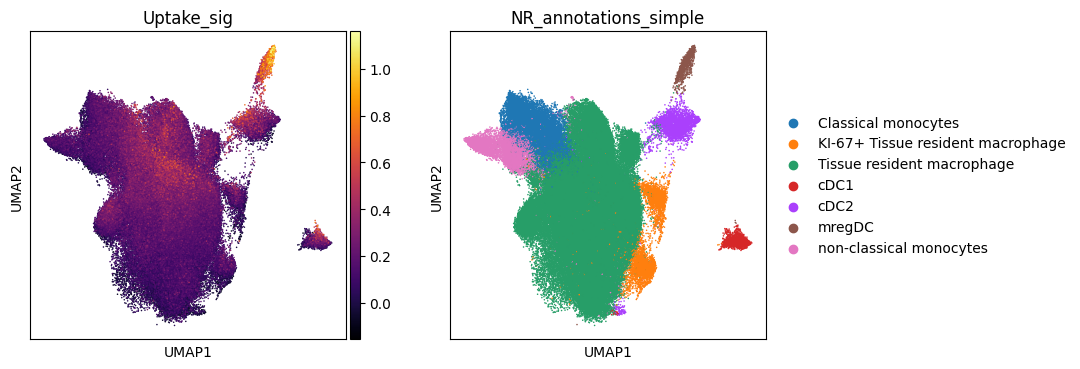

In [20]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_mets, color=colour_vars, ncols=2, size=5, color_map="inferno")

### Furthermore, we can see the signature is enriched in mregDC across all the cancer types in primary and metastatic tissues. Although to varying levels - however may not be able to directly compare given differing numbers of cells per group and different tissue sites (eg. met melanoma is LN)

* most enriched in the top half of mregDC which from Cheng gene set was the DC1 derived - makes sense 

/scratch/temp/11603491/ipykernel_2086221/1211354586.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


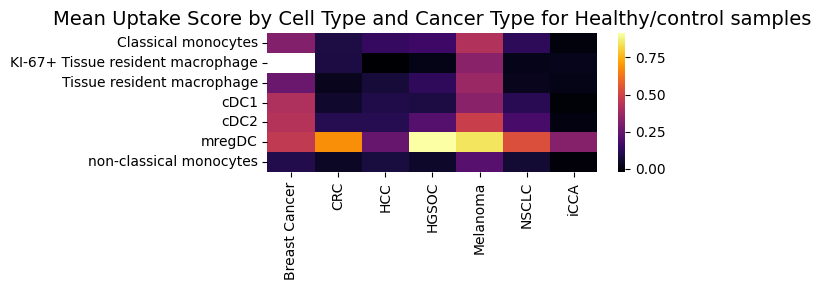

In [86]:
#Healthy:

# Calculate the mean scores for each cancer type
cell_types = data_H.obs['NR_annotations_simple']
cancer_types = data_H.obs['cancer_with_H']
uptake_scores = data_H.obs['Uptake_sig']

# Create a DataFrame with the mean scores per cell type and cancer type
scores_df = pd.DataFrame({
    'Uptake_score': uptake_scores.groupby([cancer_types, cell_types]).mean(),
})

# Pivot the DataFrame to have cancer types as columns and cell types as rows
scores_df = scores_df.unstack(level=1).T  # Unstack cancer types to columns, leaving cell types as rows

# Remove the "Uptake_score" prefix from the row labels
scores_df.index = scores_df.index.droplevel(0)  # Drop the first level of the index (Uptake_score)

# Plot the heatmap
plt.figure(figsize=(7, 3))
sns.heatmap(scores_df, cmap='inferno', annot=False, cbar=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Mean Uptake Score by Cell Type and Cancer Type for Healthy/control samples', fontsize=14)
plt.tight_layout()
plt.show()

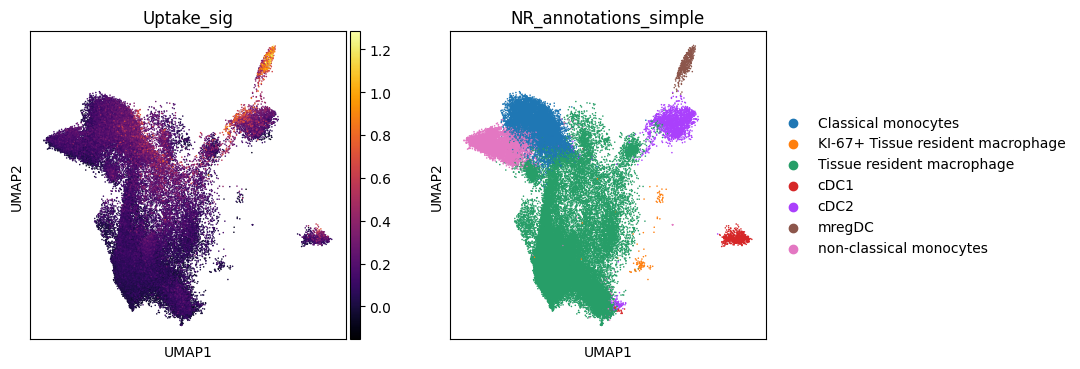

In [16]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_H, color=colour_vars, ncols=2, size=5, color_map="inferno")

In [21]:
# check
counts = data_H.obs['cancer_with_H'].value_counts()
print(counts)

cancer_with_H
NSCLC            55956
HCC               3279
HGSOC             1249
Melanoma          1082
CRC                926
Breast Cancer      807
iCCA               110
Name: count, dtype: int64


In [40]:
# check
counts = data_H.obs['site'].value_counts()
print(counts)

site
lung          55956
liver          3389
ovary          1249
lymph node     1082
colon           926
breast          807
Name: count, dtype: int64


In [41]:
#split by site:
data_H_lung = data_H[data_H.obs["site"] == "lung"]
data_H_liver = data_H[data_H.obs["site"] == "liver"]
data_H_ovary = data_H[data_H.obs["site"] == "ovary"]
data_H_LN = data_H[data_H.obs["site"] == "lymph node"]
data_H_colon = data_H[data_H.obs["site"] == "colon"]
data_H_breast = data_H[data_H.obs["site"] == "breast"]

##### Sites of healthy samples
* NSCLC - lung
* HCC - liver
* HGSOC - ovary
* Melanoma - uninvolved lymph node
* CRC - colon
* Breast cancer - Breast
* iCCA - liver 

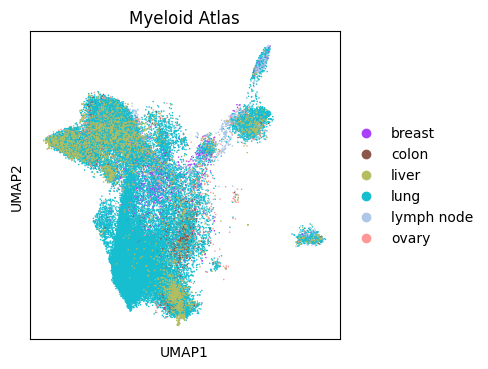

In [33]:
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_H, color="site", size=5, title="Myeloid Atlas")

In [38]:
#define function
def cluster_small_multiples(
    data_int, clust_key, size=20, frameon=False, legend_loc=None, **kwargs
):
    tmp = data_int.copy()

    for i, clust in enumerate(data_int.obs[clust_key].cat.categories):
        tmp.obs[clust] = data_int.obs[clust_key].isin([clust]).astype("category")
        tmp.uns[clust + "_colors"] = ["#d3d3d3", data_int.uns[clust_key + "_colors"][i]]

    sc.pl.umap(
        tmp,
        groups=tmp.obs[clust].cat.categories[1:].values,
        color=data_int.obs[clust_key].cat.categories.tolist(),
        size=size,
        frameon=frameon,
        legend_loc=legend_loc,
        **kwargs
    )

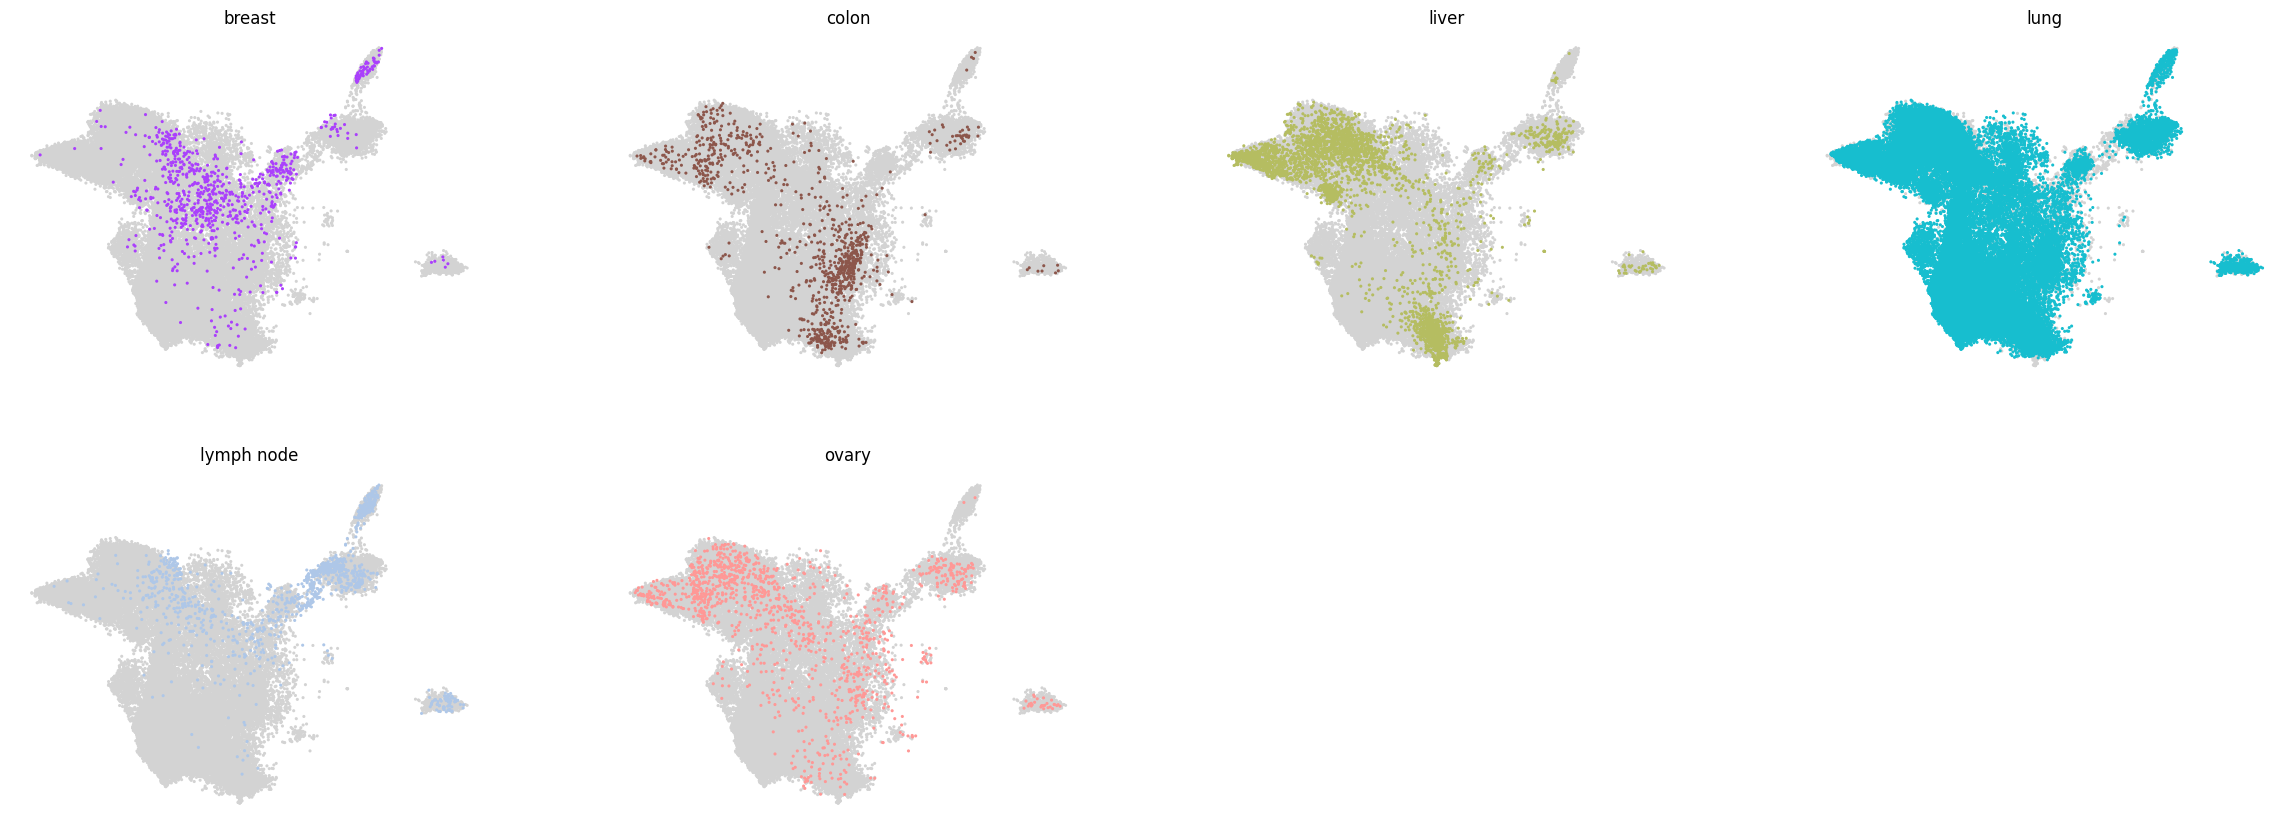

In [39]:
cluster_small_multiples(data_H, "site")

In [ ]:
#split by site:
data_H_lung = data_H[data_H.obs["site"] == "lung"]
data_H_liver = data_H[data_H.obs["site"] == "liver"]
data_H_ovary = data_H[data_H.obs["site"] == "ovary"]
data_H_LN = data_H[data_H.obs["site"] == "lymph node"]
data_H_colon = data_H[data_H.obs["site"] == "colon"]
data_H_breast = data_H[data_H.obs["site"] == "breast"]

In [46]:
colour_vars = ["Uptake_sig"]

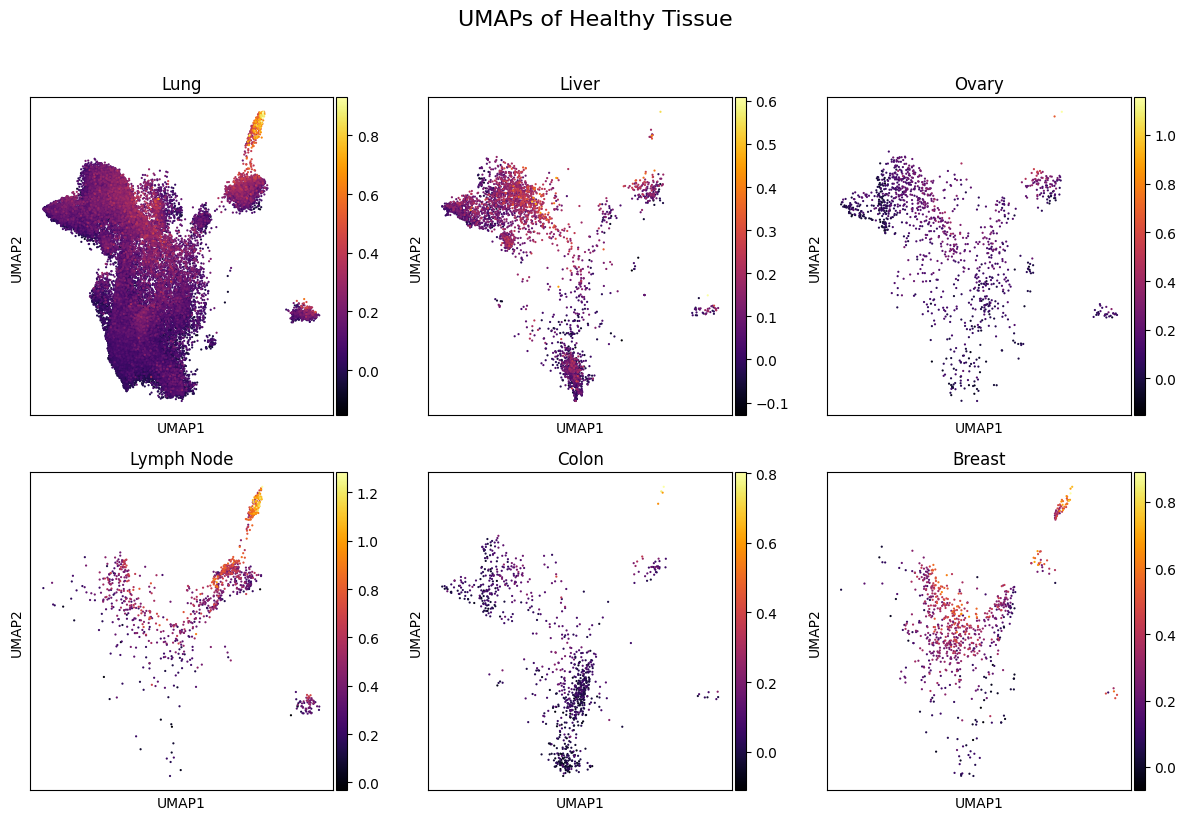

In [52]:
# Define datasets and titles
datasets = [
    (data_H_lung, "Lung"),
    (data_H_liver, "Liver"),
    (data_H_ovary, "Ovary"),
    (data_H_LN, "Lymph Node"),
    (data_H_colon, "Colon"),
    (data_H_breast, "Breast"),
]

# Create a 3x2 grid for the plots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot each dataset
for ax, (dataset, title) in zip(axes, datasets):
    sc.pl.umap(
        dataset,
        color=colour_vars,
        ncols=2,  # Use two columns for color variables per UMAP
        size=10,
        color_map="inferno",
        ax=ax,  # Render into specific subplot
        show=False,  # Avoid showing each plot separately
    )
    ax.set_title(title, fontsize=12)

# Adjust layout and add a global title
plt.suptitle("UMAPs of Healthy Tissue", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

### However, importantly the signature/mregDC are  present among healthy tissues, supporting current literature that it is not a cancer specific phenomena. However this did differ considerably between sites and majorly limited by the small number of cells we have for healthy samples. mregDC were observed in lung, breast, and LN (uninvolved LN from melanoma patients), however there was limited mregDC observed in liver, ovary, or colon - link to figure generated in previous notebook showing box plots of DC proportions in healthy tissue

* except from proportions looks like not there in lung/ very low proportion, but I can see them above, just because I have way more cells???
* because of this can I really say liver/ovary/colon don't have mregDC? or do I just not have enough cells

/scratch/temp/11603491/ipykernel_2086221/1285372803.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


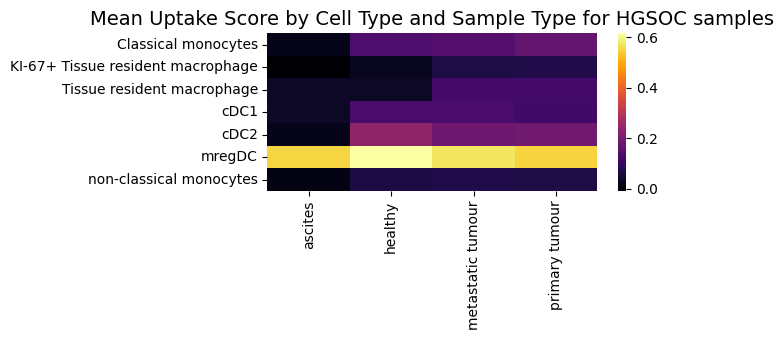

In [98]:
#OC:

# Calculate the mean scores for each cancer type
cell_types = data.obs['NR_annotations_simple']
sample_types = data.obs['sample_type_major2']
uptake_scores = data.obs['Uptake_sig']

# Create a DataFrame with the mean scores per cell type and cancer type
scores_df = pd.DataFrame({
    'Uptake_score': uptake_scores.groupby([sample_types, cell_types]).mean(),
})

# Pivot the DataFrame to have cancer types as columns and cell types as rows
scores_df = scores_df.unstack(level=1).T  # Unstack cancer types to columns, leaving cell types as rows

# Remove the "Uptake_score" prefix from the row labels
scores_df.index = scores_df.index.droplevel(0)  # Drop the first level of the index (Uptake_score)

# Plot the heatmap
plt.figure(figsize=(7, 3.5))
sns.heatmap(scores_df, cmap='inferno', annot=False, cbar=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Mean Uptake Score by Cell Type and Sample Type for HGSOC samples', fontsize=14)

# Rotate the x-axis labels to vertical
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## ^ this healthy above is like 1 cell :()